## Prodigy Infotech

### Name: Huma Urooj
### Batch : September

### Task 2


#### Create a K- Means clustering algorithm to group customers of a retail store based on their purchase history

***CustomerID:*** A unique identifier for each customer.

***Gender:*** The gender of the customer.

***Age:*** The age of the customer.

***Annual Income:*** The annual income of the customer. 

***Spending Score (1-100):*** A score indicating the customer's spending behavior.

### Import Necessary Libraries:



In [30]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

### Load the Data:



In [2]:
df= pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df. shape

(200, 5)

In [5]:
df. head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df. describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

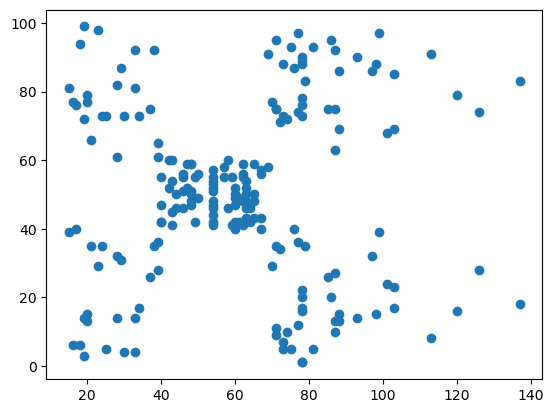

In [11]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()

In [13]:
Gender = LabelEncoder()


In [15]:
df["Gender"]= Gender.fit_transform(df["Gender"])


In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [76]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [77]:
train_test_split(X, test_size = 0.2, random_state = 42)

[     Annual Income (k$)  Spending Score (1-100)
 79                   54                      42
 197                 126                      74
 38                   37                      26
 24                   28                      14
 122                  69                      58
 ..                  ...                     ...
 106                  63                      50
 14                   20                      13
 92                   60                      49
 179                  93                      90
 102                  62                      59
 
 [160 rows x 2 columns],
      Annual Income (k$)  Spending Score (1-100)
 95                   60                      52
 15                   20                      79
 30                   30                       4
 158                  78                       1
 128                  71                      11
 115                  65                      50
 69                   48                  

In [78]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 42)

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Elbow Method:

* Create a list to store WCSS values.
* Iterate through different values of k (1 to 10).
* Create a K-means model for each k and fit it to the data.
* Append the WCSS value to the list.
* Plot the WCSS values against the number of clusters.

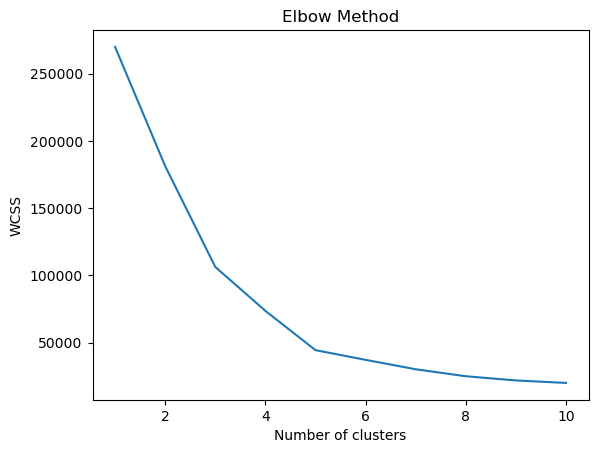

In [80]:
# Create a list to store the WCSS values
wcss = []

# Calculate WCSS for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++',max_iter = 300, n_init = 10, random_state= 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
wcss


[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30241.34361793659,
 25036.417604033984,
 21916.794789843727,
 20072.070939404006]

#### K-means Clustering:

* Create a K-means model with the determined number of clusters i.e 5 .
* Fit the model to the data.
* Add a new column to the DataFrame for cluster labels.
* Visualize the clusters.

#### Create a K-Means model with 5 clusters


In [82]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=42)

In [83]:
Y= kmeans.fit_predict(X)
Y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [84]:
# Add a new column to the DataFrame for the cluster labels
X['cluster'] = kmeans.labels_
X['cluster']

0      4
1      2
2      4
3      2
4      4
      ..
195    1
196    3
197    1
198    3
199    1
Name: cluster, Length: 200, dtype: int32

In [85]:
kmeans.inertia_


44448.45544793371

In [86]:
centers = kmeans.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

### Visualize the clusters 

* Plotting Cluster Centroids:

* X.iloc[Y==0,0]: Extracts the x-coordinates of the data points in cluster 0.
* X.iloc[Y==0,0]: Extracts the y-coordinates of the data points in cluster 0.
* s = 50: Sets the size of the data points.
* c = 'red': Sets the color of the data points to red.
* label="Cluster 1": Sets the label for the legend.
* Similar lines are used to plot the data points for clusters 2, 3, 4, and 5, each with a different color..

* s=5: Sets the size of the centroid points.

* c= "magenta": Sets the color of the centroid points to magenta.

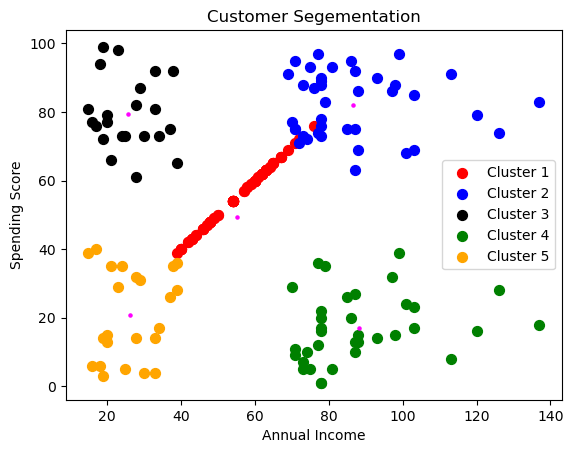

In [87]:
plt.scatter(X.iloc[Y==0,0], X.iloc[Y==0,0], s = 50,c = 'red', label="Cluster 1" )
plt.scatter(X.iloc[Y==1,0], X.iloc[Y==1,1], s = 50,c = 'blue', label="Cluster 2" )
plt.scatter(X.iloc[Y==2,0], X.iloc[Y==2,1], s = 50,c = 'black', label="Cluster 3" )
plt.scatter(X.iloc[Y==3,0], X.iloc[Y==3,1], s = 50,c = 'green', label="Cluster 4" )
plt.scatter(X.iloc[Y==4,0], X.iloc[Y==4,1], s = 50,c = 'orange', label="Cluster 5" )
plt.scatter(centers[:,0],centers[:,1],s=5,c= "magenta")
plt.title("Customer Segementation")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

In [88]:
kmeans.fit(df[[ 'Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster'] = X['cluster']

In [89]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3


In [90]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,2
2,3,0,20,16,6,4
3,4,0,23,16,77,2
4,5,0,31,17,40,4


In [102]:
cluster_1 = df[df['Spending and Income Cluster'] == 1]
cluster_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,clust1
123,124,1,39,69,91,1,True
125,126,0,31,70,77,1,True
127,128,1,40,71,95,1,True
129,130,1,38,71,75,1,True
131,132,1,39,71,75,1,True
133,134,0,31,72,71,1,True
135,136,0,29,73,88,1,True
137,138,1,32,73,73,1,True
139,140,0,35,74,72,1,True
141,142,1,32,75,93,1,True


In [103]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 123 to 199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   CustomerID                   39 non-null     int64
 1   Gender                       39 non-null     int32
 2   Age                          39 non-null     int64
 3   Annual Income (k$)           39 non-null     int64
 4   Spending Score (1-100)       39 non-null     int64
 5   Spending and Income Cluster  39 non-null     int32
 6   clust1                       39 non-null     bool 
dtypes: bool(1), int32(2), int64(4)
memory usage: 1.9 KB


In [104]:
cluster_1.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,0.461538,32.692308,86.538462,82.128205,1.0
std,22.803509,0.505035,3.728650,16.312485,9.364489,0.0
min,124.000000,0.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,0.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,0.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,1.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,1.000000,40.000000,137.000000,97.000000,1.0


In [105]:
cluster_2 = df[df['Spending and Income Cluster'] == 2]
cluster_2

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,clust1
1,2,1,21,15,81,2,False
3,4,0,23,16,77,2,False
5,6,0,22,17,76,2,False
7,8,0,23,18,94,2,False
9,10,0,30,19,72,2,False
11,12,0,35,19,99,2,False
13,14,0,24,20,77,2,False
15,16,1,22,20,79,2,False
17,18,1,20,21,66,2,False
19,20,0,35,23,98,2,False


In [106]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 1 to 45
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   CustomerID                   22 non-null     int64
 1   Gender                       22 non-null     int32
 2   Age                          22 non-null     int64
 3   Annual Income (k$)           22 non-null     int64
 4   Spending Score (1-100)       22 non-null     int64
 5   Spending and Income Cluster  22 non-null     int32
 6   clust1                       22 non-null     bool 
dtypes: bool(1), int32(2), int64(4)
memory usage: 1.1 KB


In [107]:
cluster_2.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,0.409091,25.272727,25.727273,79.363636,2.0
std,13.147185,0.503236,5.257030,7.566731,10.504174,0.0
min,2.000000,0.000000,18.000000,15.000000,61.000000,2.0
25%,12.500000,0.000000,21.250000,19.250000,73.000000,2.0
50%,23.000000,0.000000,23.500000,24.500000,77.000000,2.0
75%,33.500000,1.000000,29.750000,32.250000,85.750000,2.0
max,46.000000,1.000000,35.000000,39.000000,99.000000,2.0


In [108]:
cluster_3 = df[df['Spending and Income Cluster'] == 3]
cluster_3

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,clust1
124,125,0,23,70,29,3,False
128,129,1,59,71,11,3,False
130,131,1,47,71,9,3,False
134,135,1,20,73,5,3,False
136,137,0,44,73,7,3,False
138,139,1,19,74,10,3,False
140,141,0,57,75,5,3,False
144,145,1,25,77,12,3,False
146,147,1,48,77,36,3,False
148,149,0,34,78,22,3,False


In [109]:
cluster_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 124 to 198
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   CustomerID                   35 non-null     int64
 1   Gender                       35 non-null     int32
 2   Age                          35 non-null     int64
 3   Annual Income (k$)           35 non-null     int64
 4   Spending Score (1-100)       35 non-null     int64
 5   Spending and Income Cluster  35 non-null     int32
 6   clust1                       35 non-null     bool 
dtypes: bool(1), int32(2), int64(4)
memory usage: 1.7 KB


In [110]:
cluster_3.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.0
mean,164.371429,0.542857,41.114286,88.200000,17.114286,3.0
std,21.457325,0.505433,11.341676,16.399067,9.952154,0.0
min,125.000000,0.000000,19.000000,70.000000,1.000000,3.0
25%,148.000000,0.000000,34.000000,77.500000,10.000000,3.0
50%,165.000000,1.000000,42.000000,85.000000,16.000000,3.0
75%,182.000000,1.000000,47.500000,97.500000,23.500000,3.0
max,199.000000,1.000000,59.000000,137.000000,39.000000,3.0


In [111]:
cluster_4 = df[df['Spending and Income Cluster'] == 4]
cluster_4

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster,clust1
0,1,1,19,15,39,4,False
2,3,0,20,16,6,4,False
4,5,0,31,17,40,4,False
6,7,0,35,18,6,4,False
8,9,1,64,19,3,4,False
10,11,1,67,19,14,4,False
12,13,0,58,20,15,4,False
14,15,1,37,20,13,4,False
16,17,0,35,21,35,4,False
18,19,1,52,23,29,4,False


In [112]:
cluster_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 44
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   CustomerID                   23 non-null     int64
 1   Gender                       23 non-null     int32
 2   Age                          23 non-null     int64
 3   Annual Income (k$)           23 non-null     int64
 4   Spending Score (1-100)       23 non-null     int64
 5   Spending and Income Cluster  23 non-null     int32
 6   clust1                       23 non-null     bool 
dtypes: bool(1), int32(2), int64(4)
memory usage: 1.1 KB


In [113]:
cluster_4.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
count,23.00000,23.000000,23.000000,23.000000,23.000000,23.0
mean,23.00000,0.391304,45.217391,26.304348,20.913043,4.0
std,13.56466,0.499011,13.228607,7.893811,13.017167,0.0
min,1.00000,0.000000,19.000000,15.000000,3.000000,4.0
25%,12.00000,0.000000,35.500000,19.500000,9.500000,4.0
50%,23.00000,0.000000,46.000000,25.000000,17.000000,4.0
75%,34.00000,1.000000,53.500000,33.000000,33.500000,4.0
max,45.00000,1.000000,67.000000,39.000000,40.000000,4.0


#### Cluster 1:

***High Income, High Spenders:*** Customers in this cluster likely have high incomes and are willing to spend a significant amount of money. They are valuable customers for the store and could be targeted with premium products and services.

#### Cluster 2:

***Low Income, High Spenders:*** This cluster might represent customers who are willing to spend more than their income might suggest. They could be targeted with flexible payment options or loyalty programs.

#### Cluster 3:
***High Income, Low Spenders:*** This cluster might represent customers who are price-conscious despite their high incomes. They could be targeted with value-oriented offers and promotions.


#### Cluster 4:

***Low Income, Low Spenders:*** Customers in this cluster may have limited budgets and tend to spend less. They could be targeted with budget-friendly options and promotions.